# Jair Sánchez Sierra       cc 1003231158

# Examen 2: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia

El examen consta de dos partes, cada una con igual valor. Es un examen individual y no se permite el uso de herramientas de inteligencia artificial para su realización. Una lectura detallada será suficiente para resolver ambos problemas, basándose en los conocimientos adquiridos en el curso.


### I. Radiación de Cuerpo Negro:

 La radiación de cuerpo negro, se refiere a la radiación electromagnética emitida por un objeto que absorbe toda la radiación incidente sin reflejar nada. La cual  puede ser modelada según la ley de Planck que relaciona la intensidad de la radiación de un cuerpo negro con la temperatura del objeto. A medida que la temperatura aumenta, la longitud de onda máxima de la radiación se desplaza hacia longitudes de onda más cortas. Para generar una intuición,  piensa en  trozo  de carbón, el cual representa un ejemplo cercano a lo que se conoce como un cuerpo negro en física. Este elemento tiene la particularidad de reflejar mínimamente la luz, capturando prácticamente toda la radiación que recibe. Al alcanzar temperaturas elevadas, similar a las de las brasas ardientes, el carbón comienza a emitir radiación tanto en el rango visible como en el infrarrojo del espectro.

  La radiación de cuerpo negro puede ser modelada empleando la ley de Planck para describir la densidad  espectral  de energía de la radiación emitida por un cuerpo negro a una temperatura (T). La ley de Planck establece que la densidad espectral de energía $u(\lambda, T)$  para un cuerpo negro está dada por:

\begin{equation}
u(\lambda, T) = \frac{{8\pi hc}}{{\lambda^5}} \cdot \frac{1}{{e^{\frac{{hc}}{{\lambda k_B T}}} - 1}}
\end{equation}

 donde:

$h = 6.62607015  \times 10^{-34} \mathrm{J} s$ : es la constante de Planck.

$c = 299792458 \mathrm{m/s}$ : es la velocidad de la luz.


$k_B = 1.380649 \times 10^{-23}\mathrm{J/K}$ : es la constante de Boltzmann.

$ \lambda$ es la longitud de onda.


Podemos integrar la densidad espectral de energía sobre todas las longitudes de onda para obtener la potencia total emitida por unidad de área de un cuerpo negro a una temperatura (T) (ley  de Stefan-Boltzmann):


\begin{equation}
P_{\text{total}} = \sigma T^4
\end{equation}

donde:

$\sigma$ es la constante de Stefan-Boltzmann.


Su tarea en este examen será:

1. Realizar una gráfica de $u(\lambda, T)$ vs $\lambda$, toma valores de $\lambda$ entre $1\mathrm{nm}$ y $8\mathrm{\mu m}$, para valores de
```T=np.array([1000,2000,4000,5000]) ```K


Las curvas resultantes deben reflejar el comportamiento típico de datos experimentales, tal como se muestra al ejecutar el siguiente código :

```python
import requests
from io import StringIO


# URL del archivo txt en línea
url_del_archivo = 'http://www.sc.ehu.es/sbweb/fisica3/calor/radiacion/espectro.txt'

# Realizar una petición GET para obtener el contenido del archivo
respuesta = requests.get(url_del_archivo)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    # Acceder al contenido del archivo
    data_string = respuesta.text
else:
    print(f"Error al acceder al archivo: {respuesta.status_code}")
# Utilizar StringIO para simular un archivo en memoria a partir del string
data = StringIO(data_string)
# Convertir el string a DataFrame, especificando el separador de espacios
df = pd.read_csv(data, sep=" ", header=None)
# Asignar nombres a las columnas si es necesario
df.columns = ['A', 'B', 'C', "D"]
# Mostrar el DataFrame
plt.plot(df.A, df.B)
```



2. Determina la longitud de onda para el cual se obtiene el  máximo valor de cada unas de las anteriores curvas, comprueba que $\lambda_{max} T=2897.8 \mathrm{\mu mK}$



3. De la ley de densidad espectral de energía, mostrar que la potencia total emitida por unidad de área $P_{total}$ es:



\begin{equation}
P_{\text{total}} =  \frac{c}{4}\int_0^{\infty} u(\lambda, T) \mathrm{d}\lambda = \sigma T^4
\end{equation}

donde $\sigma=5.67\times 10^{-8}\mathrm{W m^{-2} K^{-4}}$. Para resolver la integral, se recomienda emplear la sustitución $x=\frac{hc}{\lambda k_BT}$ y emplear algún método computacional de integración conocido :

\begin{equation}
P_{\text{total}} \propto \int_0^{\infty} \frac{x^3}{e^{x}-1} \mathrm{d}x
\end{equation}

muestre que el valor de la integral se aproxima al valor esperado $\frac{\pi^4}{15}$.

Con el resultado anterior, construya una curva de $P_{total}$ vs $T^4$, ¿su resultado esta acorde con los esperado?



In [157]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sc
import sympy as sp
import requests
from io import StringIO
from sympy import pi, oo, tan, symbols, integrate
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

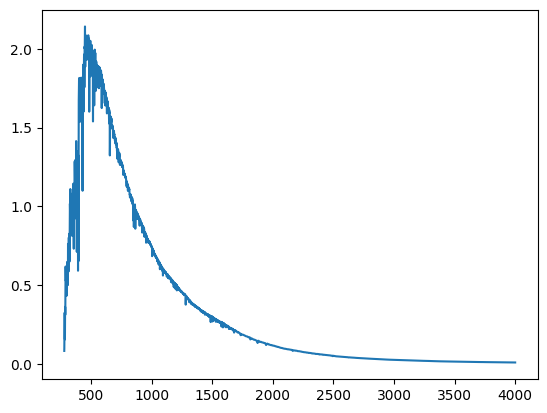

In [158]:
# @title Primer punto  (Resultados experimentales)

# URL del archivo txt en línea
url_del_archivo = 'http://www.sc.ehu.es/sbweb/fisica3/calor/radiacion/espectro.txt'

# Realizar una petición GET para obtener el contenido del archivo
respuesta = requests.get(url_del_archivo)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    # Acceder al contenido del archivo
    data_string = respuesta.text
else:
    print(f"Error al acceder al archivo: {respuesta.status_code}")
# Utilizar StringIO para simular un archivo en memoria a partir del string
data = StringIO(data_string)
# Convertir el string a DataFrame, especificando el separador de espacios
df = pd.read_csv(data, sep=" ", header=None)
# Asignar nombres a las columnas si es necesario
df.columns = ['A', 'B', 'C', "D"]
# Mostrar el DataFrame
plt.plot(df.A, df.B)


\begin{equation}
u(\lambda, T) = \frac{{8\pi hc}}{{\lambda^5}} \cdot \frac{1}{{e^{\frac{{hc}}{{\lambda k_B T}}} - 1}}
\end{equation}


$h = 6.62607015  \times 10^{-34} \mathrm{J} s$ : es la constante de Planck.

$c = 299792458 \mathrm{m/s}$ : es la velocidad de la luz.


$k_B = 1.380649 \times 10^{-23}\mathrm{J/K}$ : es la constante de Boltzmann.

$ \lambda$ es la longitud de onda.

1. Realizar una gráfica de $u(\lambda, T)$ vs $\lambda$, toma valores de $\lambda$ entre $1\mathrm{nm}$ y $8\mathrm{\mu m}$, para valores de
```T=np.array([1000,2000,4000,5000]) ```K


<ipython-input-159-293f40983035>:8: RuntimeWarning: overflow encountered in exp
  u_2 = 1 / (np.exp((h*c)/((longitud*K_b*T)) - 1))


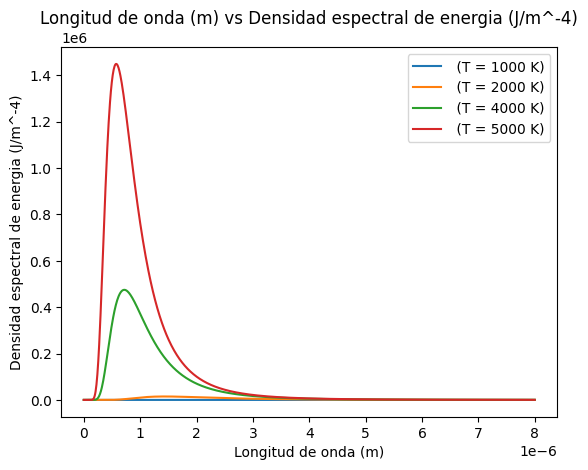

In [159]:
# @title Primer punto
h = 6.62607015e-34  #[Js] constante de planck
c = 299792458   #[m/s] velocidad de la luz
K_b = 1.380649e-23  #[J/K] constante de Boltzmann

def den_ene(longitud, T):    #función de densidad espectral de energia
  u_1 = (8 * np.pi * h * c)/((longitud)**5)
  u_2 = 1 / (np.exp((h*c)/((longitud*K_b*T)) - 1))
  u = u_1 * u_2
  return u



nm = 1 / (1e9) #m
mm = 8 / (1e6) #m
#print(nm,mm, )

T = np.array([1000,2000,4000,5000])
#print(T[3])

for i in range(len(T)):
  longitud = np.linspace(nm,mm, 1000)
  den = den_ene(longitud, T[i])
  #print(den)


  plt.plot(longitud,den, label=f" (T = {T[i]} K)")
  #plt.plot(densidades ,"ro")

  plt.title("Longitud de onda (m) vs Densidad espectral de energia (J/m^-4)")
  plt.xlabel("Longitud de onda (m)")
  plt.ylabel("Densidad espectral de energia (J/m^-4)")
  plt.legend()



  #plt.xlim(0,4000)
  #plt.ylim(0,2)

2. Determina la longitud de onda para el cual se obtiene el  máximo valor de cada unas de las anteriores curvas, comprueba que $\lambda_{max} T=2897.8 \mathrm{\mu mK}$

In [160]:
densidades = np.array([den_ene(longitud, i) for i in T])
#print(densidades)
indices_max = np.argmax(densidades, axis=1)
longitud_max = longitud[indices_max]

for i, j in enumerate(T):
  #print(i,j)
  print(f"Temperatura: {j} K, longitud de onda maxima: {longitud_max[i]*1e6} μm")



Temperatura: 1000 K, longitud de onda maxima: 2.875515515515515 μm
Temperatura: 2000 K, longitud de onda maxima: 1.4422612612612613 μm
Temperatura: 4000 K, longitud de onda maxima: 0.7216306306306306 μm
Temperatura: 5000 K, longitud de onda maxima: 0.5775045045045044 μm


<ipython-input-159-293f40983035>:8: RuntimeWarning: overflow encountered in exp
  u_2 = 1 / (np.exp((h*c)/((longitud*K_b*T)) - 1))


In [161]:
lambda_max = 2897.8 / T
k = lambda_max * T # se comprueba la ecuación de lambda maximos
k


array([2897.8, 2897.8, 2897.8, 2897.8])

3. De la ley de densidad espectral de energía, mostrar que la potencia total emitida por unidad de área $P_{total}$ es:



\begin{equation}
P_{\text{total}} =  \frac{c}{4}\int_0^{\infty} u(\lambda, T) \mathrm{d}\lambda = \sigma T^4
\end{equation}

donde $\sigma=5.67\times 10^{-8}\mathrm{W m^{-2} K^{-4}}$. Para resolver la integral, se recomienda emplear la sustitución $x=\frac{hc}{\lambda k_BT}$ y emplear algún método computacional de integración conocido :

\begin{equation}
P_{\text{total}} \propto \int_0^{\infty} \frac{x^3}{e^{x}-1} \mathrm{d}x
\end{equation}

muestre que el valor de la integral se aproxima al valor esperado $\frac{\pi^4}{15}$.

Con el resultado anterior, construya una curva de $P_{total}$ vs $T^4$, ¿su resultado esta acorde con los esperado?

In [162]:
def integral_P(x):
    return x**3 / (np.exp(x) - 1)

integral, error = sc.integrate.quad(integral_P, 0, np.inf)

valor_esp = np.pi**4 / 15


print("Valor aproximado de la integral:", integral)
print("Valor esperado de la integral:", valor_esp)

Valor aproximado de la integral: 6.49393940226683
Valor esperado de la integral: 6.493939402266828


<ipython-input-162-c996df7d442e>:2: RuntimeWarning: overflow encountered in exp
  return x**3 / (np.exp(x) - 1)


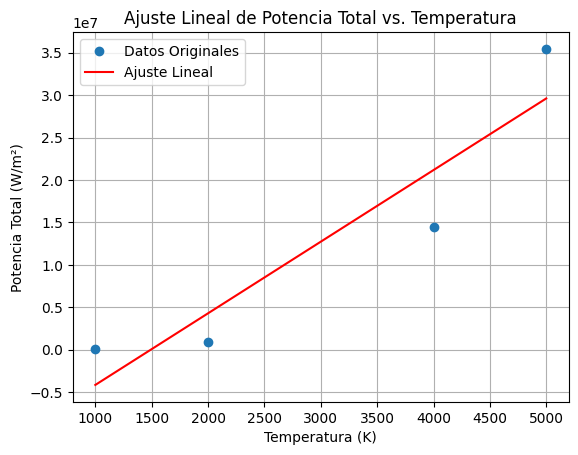

Pendiente (sigma): 8436.960037010143 W/m²K⁴


In [163]:
sigma = 5.67 * (10**-8)  # W m⁻² K⁻⁴

T = np.array([1000, 2000, 4000, 5000])

P = lambda T: sigma * T**4    #Potencia total


P_nue = P(T)  #valores de potencia para temperaturas dadas



def Ajuste_lineal(x, m,b):  #función del ajuste, solo tenemos la pendinete que es sigma
    return m * x + b


resultado, err = sc.optimize.curve_fit(Ajuste_lineal, T, P_nue)  #se ajustan los datos
m = resultado[0]  #la pendiente
b = resultado[1]

T4_fit = np.linspace(np.min(T), np.max(T), 100)
P_fit = Ajuste_lineal(T4_fit, m, b)


plt.plot(T, P_nue, "o", label="Datos Originales")
plt.plot(T4_fit, P_fit, "r-", label="Ajuste Lineal")
plt.xlabel("Temperatura (K)")
plt.ylabel("Potencia Total (W/m²)")
plt.title("Ajuste Lineal de Potencia Total vs. Temperatura")
plt.legend()
plt.grid()
plt.show()


print(f"Pendiente (sigma): {m} W/m²K⁴")


In [164]:
x = symbols("x")

integral = (x**3) / (sp.exp(x) - 1)
i = integrate(integral,(x,1,oo))
i

∞          
⌠          
⎮    3     
⎮   x      
⎮ ────── dx
⎮  x       
⎮ ℯ  - 1   
⌡          
1          

# 2. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:


```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```


 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.


6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.






In [165]:
# @title Punto dos

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.

In [166]:
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
print(data)

    Año  NoSauvizado  Promedio_5
0  1880        -0.17       -0.09
1  1881        -0.09       -0.13
2  1882        -0.11       -0.17
3  1883        -0.17       -0.21
4  1884        -0.29       -0.24
      Año  NoSauvizado  Promedio_5
0    1880        -0.17       -0.09
1    1881        -0.09       -0.13
2    1882        -0.11       -0.17
3    1883        -0.17       -0.21
4    1884        -0.29       -0.24
..    ...          ...         ...
139  2019         0.98        0.94
140  2020         1.02        0.95
141  2021         0.85        0.98
142  2022         0.90        1.00
143  2023         1.17        1.02

[144 rows x 3 columns]


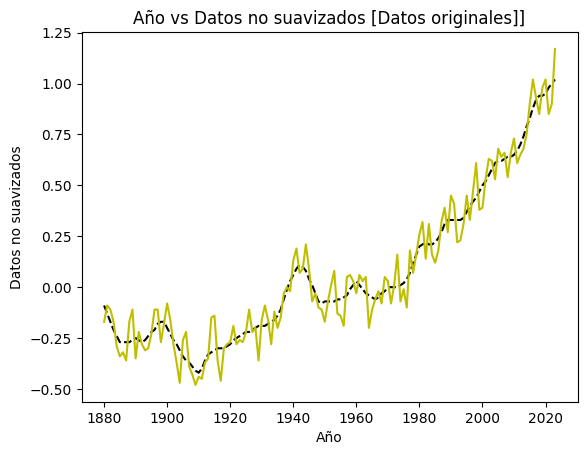

In [167]:
# @title 1. 2. 3. Gráficos y conclusiones
plt.xlabel("Año")
plt.ylabel("Datos no suavizados")
plt.title("Año vs Datos no suavizados [Datos originales]]")
plt.plot(data["Año"],data["Promedio_5"],"k--")
plt.plot(data["Año"],data["NoSauvizado"],"y-")

#Conclusiones del grafico

Se evidencia claramente un aumento de la temperatura a lo largo de los años. Comparando los datos no suavizados y la media movil de 5 años, se puede decir que estos primeros tiene más variación en un tiempo corto. Esta diferencia puede ayudarnos a entender cuando hubo o habrá (una predicción) un cambio significativo en la temperatura global.
En definitva, esta grafica nos muestra la evolución de la temperatura global y las variaciones que con el tiempo pueden ayudar a entender el comportamiento de la tempertaura global.

 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.


6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.

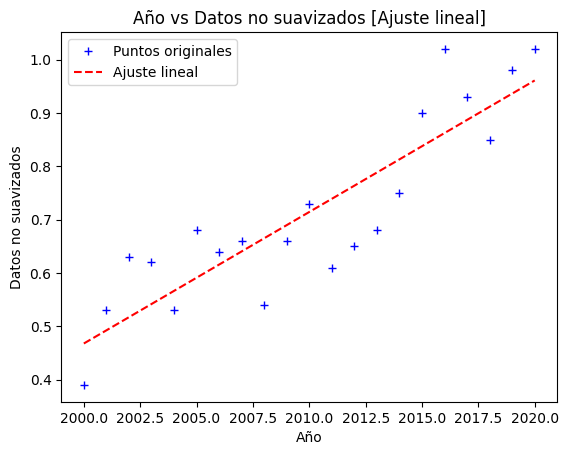

In [168]:
#@title 4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.

data_p = data[(data["Año"] >= 2000) & (data["Año"] <= 2020)]

def cur(x,m,b):    #funcion de ajuste lineal
  y = x*m + b
  return y

x = data_p["Año"]
y = data_p["NoSauvizado"]

x_fit = np.linspace(min(x), max(x), 100)

v, residuo = sc.optimize.curve_fit(cur, x, y )  #ajustando
y_ = x_fit * v[0] + v[1]

plt.xlabel("Año")
plt.ylabel("Datos no suavizados")
plt.title("Año vs Datos no suavizados [Ajuste lineal]")
plt.plot(x,y,"b+", label="Puntos originales")
plt.plot(x_fit,y_, "r--", label="Ajuste lineal")
plt.legend()
plt.show()

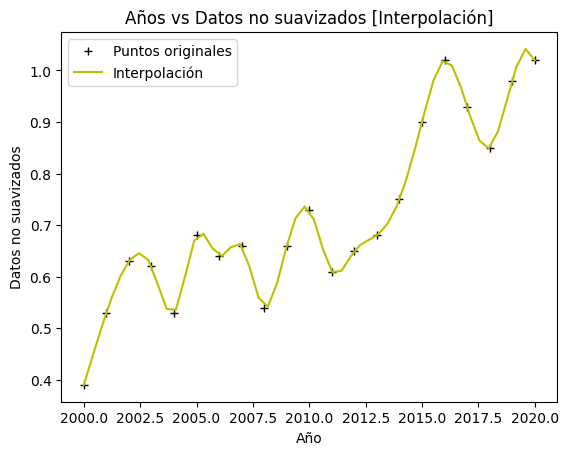

In [169]:
#@title 5. Interpolar los datos entre los años 2000 y 2020.

x_nu = np.linspace(2000,2020)


P_X = CubicSpline(x,y)   #función interpolación


plt.xlabel("Año")
plt.ylabel("Datos no suavizados")
plt.title("Años vs Datos no suavizados [Interpolación]")
plt.plot(x,y,"k+",label="Puntos originales")
plt.plot(x_nu, P_X(x_nu),"y-", label = "Interpolación")
plt.legend()

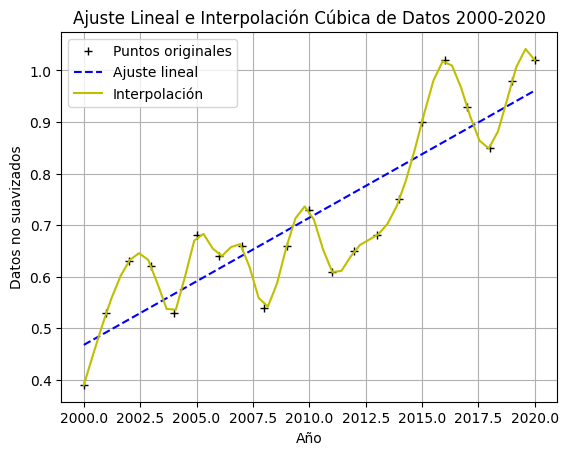

In [170]:
# @title Ajuste lineal e Interpolación
plt.xlabel("Año")
plt.ylabel("Datos no suavizados")
plt.title("Ajuste Lineal e Interpolación Cúbica de Datos 2000-2020")
plt.plot(x,y,"k+",label="Puntos originales")
plt.plot(x_fit,y_, "b--", label="Ajuste lineal")
plt.plot(x_nu, P_X(x_nu),"y-", label = "Interpolación")
plt.legend()
plt.grid()
plt.show()

#6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.


--> Se observa que los datos no tienen una forma lineal, por eso no creo que sea la mejor manera de representar los datos, sin embargo si se quiere saber la tendencia de la temperatura a lo largo de los años (hacer extrapolación), sería muy viable usar un ajuste de parametros.

En cambio, la interpolación ayuda a que la representación de los datos sea más cercana a los datos medidos, y se pueda tener idea de las tendencia locales y los cambios más pequeños.

En conclusion, es preferible realizar un ajuste de parametros si se quiere saber una tendencia global de los datos, porque la interpolación no es concluyente con los datos que se salen del rango dado.

# 7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.

--> En ese sentido, el ajuste lineal nos ayudará a predecir la temperatura para el año 2030. Simplemente podríamos aplicar la ecuación de la recta para calcular la temperatura estimada en 2030. Porque si analisamos la extrapolación que se hace con la interpolación se puede ver que no sigue con la tendecia que se esperaria (se muestra a continuación).

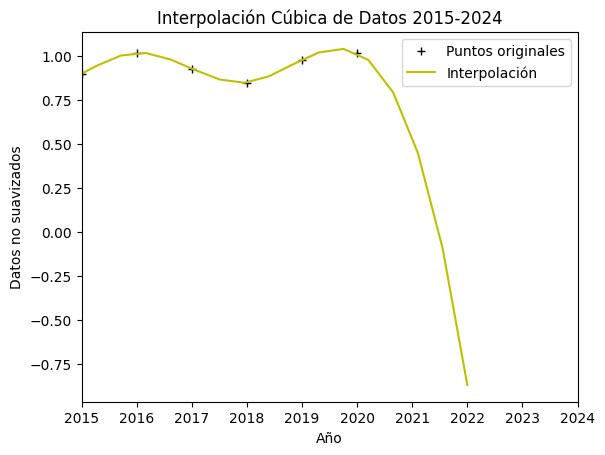

In [180]:
plt.xlabel("Año")
plt.ylabel("Datos no suavizados")
plt.title("Interpolación Cúbica de Datos 2015-2024")
plt.plot(x,y,"k+",label="Puntos originales")
plt.xlim(2015,2024)
x_nu = np.linspace(2000,2022)
plt.plot(x_nu, P_X(x_nu),"y-", label = "Interpolación")
plt.legend()
plt.show()

Se puede observar que la interpolación no ayuda a predecir las temperaturas en el futuro, de una buena manera. En cambio, el ajuste de parametros mostraba una tendencia que nos ayudaría a entender mejor lo que pasará a futuro.